In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tatamehhh12","key":"c8d80b1f04808c394c0d07efcbf077f4"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d cpluzshrijayan/milkquality

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
License(s): unknown
  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 3.02MB/s]


In [4]:
!unzip milkquality.zip -d milkquality
!ls milkquality

Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [37]:
df = pd.read_csv("/content/milkquality/milknew.csv")

In [38]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [40]:
fig = px.histogram(df, x='Grade')

fig.update_layout(title_text='<b>Milky</b>', title_x=0.5)

fig.show()

In [41]:
X = df.drop("Grade",axis=1)
y = pd.get_dummies(df['Grade'])

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(1059, 7)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

In [44]:
X_train.shape

(953, 7)

In [45]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape= X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [46]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="rmsprop")
early_stop = keras.callbacks.EarlyStopping(patience=20)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stop)

Epoch 1/50
30/30 [==============================] - 3s 30ms/step - loss: 0.8554 - accuracy: 0.5971 - val_loss: 0.8315 - val_accuracy: 0.5377
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8160 - accuracy: 0.6044 - val_loss: 0.7879 - val_accuracy: 0.7075
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.8151 - accuracy: 0.6034 - val_loss: 0.7942 - val_accuracy: 0.6698
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8039 - accuracy: 0.5929 - val_loss: 0.8217 - val_accuracy: 0.5377
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7850 - accuracy: 0.6222 - val_loss: 0.7706 - val_accuracy: 0.6226
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7696 - accuracy: 0.6411 - val_loss: 0.7588 - val_accuracy: 0.6509
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7763 - accuracy: 0.6191 - val_loss: 0.7348 - val_accuracy: 0.6604
Epoch 8/50
30/30 [=

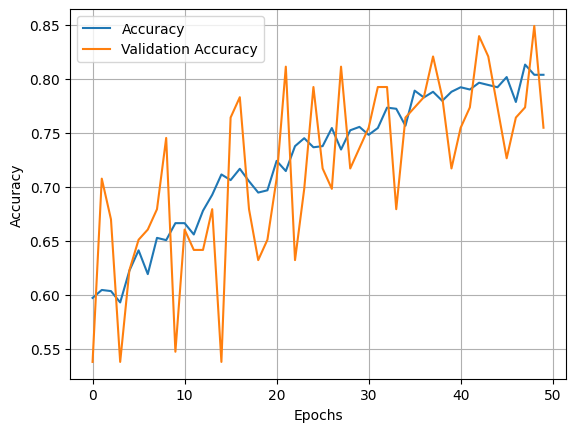

In [51]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

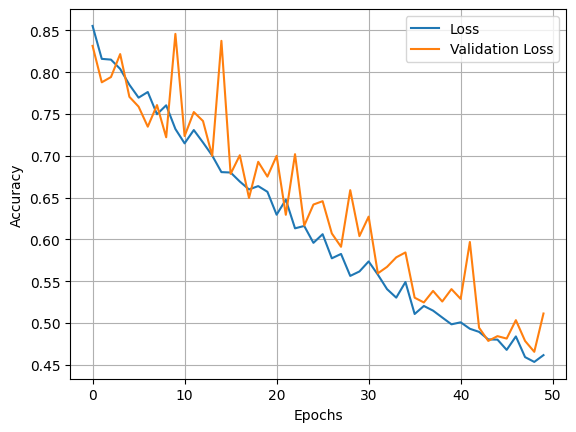

In [52]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [53]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 3ms/step


In [54]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7452830188679245


In [55]:
model.save('./Milky.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [56]:
model = tf.keras.models.load_model('./Milky.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./Milky.tflite", "wb").write(tflite_model)

3164